# **Project: Titanic - Machine Learning from Disaster**

# **Table of contents**
* 1. Introduction
* 2. Loading data
* 3. Exploratory Data Analysis (EDA)

 # **2. Loading data**

In [2]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Notes:
* SibSp: number of siblings/ spouses aboard the Titanic
* Parch: number of parents/children abroad the Titanic
* Ticket: Ticket number
* Cabin: Cabin number


In [6]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.set_index(train_df.PassengerId, inplace = True)

In [8]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_df.drop("PassengerId", axis=1, inplace=True)

In [10]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [11]:
test_df = pd.read_csv('./data/test.csv', index_col = 'PassengerId')

In [12]:
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Feature Classification: Categorical(dang phan loai) vs Numerical (dang so hoc)
* Dieu nay giup cho viec lua chon do thi phu hop de visualize

### Which features are categorical?
* Categorical features: nominal, ordinal, ratio, interval
* To classify the samples into sets of similar samples

### Which features are numerical?
* Categorical features: discrete, continous, timeseries
* These values change from sample to sample

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB



* Co vai cot bi missing vlaue (vidu Age chi co 714 values)
* Trong buoc tien xu ly du lieu se phai xu ly
***

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB



* Categorical: Survived, Sex, Embarked, Pclass(ordinal), SibSp, Parch
* Numerical: Age (continous), Fare (discrete)
* Mix types: Ticket, Cabin
* Contain Error/Typo: Name
* Blank or Null (thieu gia tri): Cabin > Age > Embarked
* Various Data Type: String, Int, Float
***

In [15]:
features = ["Survived","Pclass", "Sex", "SibSp", "Parch", "Embarked"]
# features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype("category")

convert_cat(train_df, features)
# convert_cat(test_df, features)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


***
### a. Distribution of Numerical feature values across the samples

In [17]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200



* Chi co cac cot co loai Numerical moi duoc thong ke
***

### b. Distribution of Categorical features

In [18]:
train_df.describe(include= ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# **3. Exploratory Data Analysis (EDA)**
### 3.1. Correlating categorical features
* Categorical: Survived, Sex, Embarked, Pclass, SibSp, Parch
### Target Variable: Survived

In [19]:
train_df["Survived"].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [20]:
train_df["Survived"].value_counts(normalize = True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


### `Sex`

In [21]:
train_df['Sex'].value_counts(normalize= True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


<Axes: xlabel='Sex', ylabel='count'>

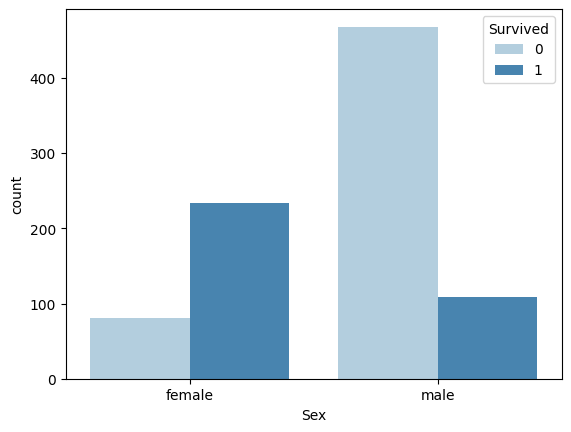

In [22]:
sns.countplot(data = train_df, x= 'Sex', hue = 'Survived', palette = 'Blues')

- Remaining categorical feature columns

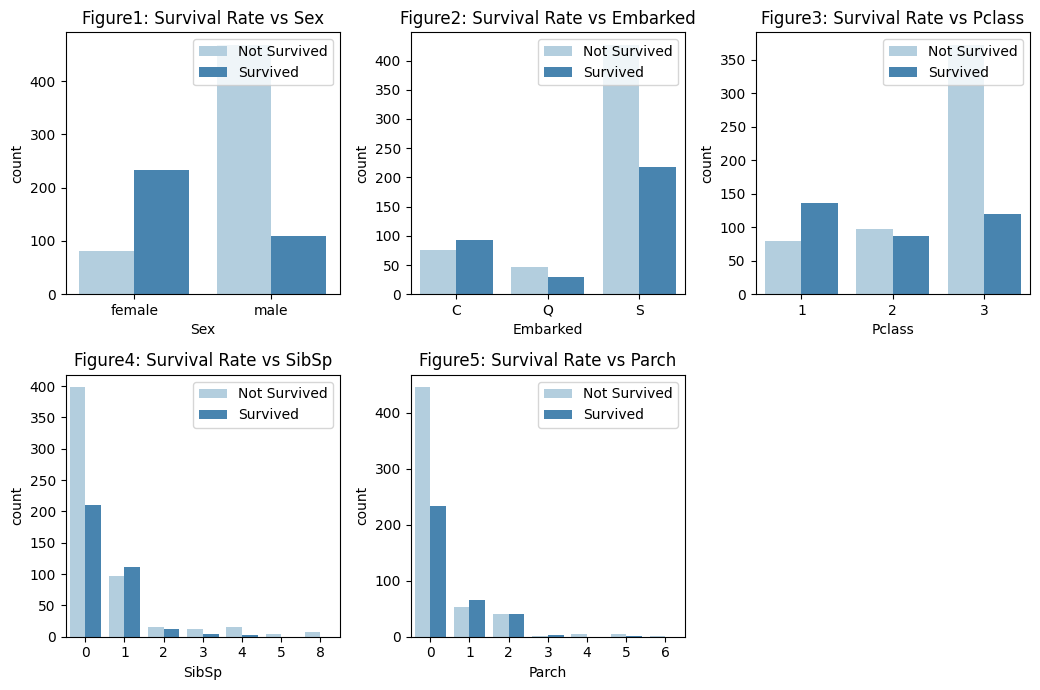

In [23]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r, c]
            sns.countplot(data = train_df, x = cols[i], hue = "Survived", palette= "Blues", ax = ax_i)
            ax_i.set_title(f"Figure{i +1}: Survival Rate vs {cols[i]}" )
            ax_i.legend(title="", loc = 'upper right', labels = ['Not Survived', 'Survived'])

ax.flat[-1].set_visible(False) # remove the last subplot
plt.tight_layout()
plt.show()

### Observation:
* Survival Rate:
- Fig1: Female survival rate > male
- Fig2: most people embarked on Southampton and also had the highest people not survived
- Fig3: 1st class higher survival rate
- Fig4: People with 0 SibSp are mostly not survived.
- Fig5: people with 0 Parch are mostly not survived

***
## 3.2. EDA for Numerical Features
* Numerical Features: Age, Fare

<Axes: xlabel='Age', ylabel='Count'>

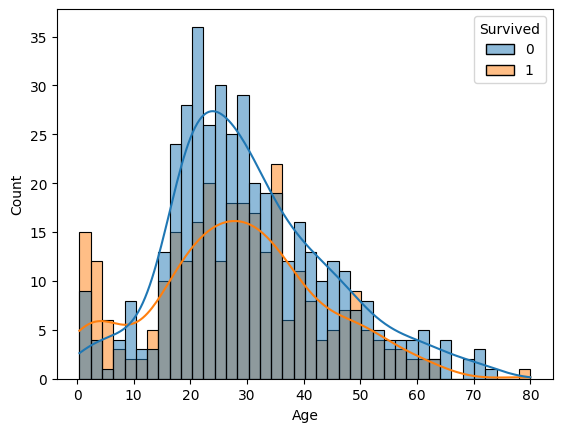

In [24]:
sns.histplot(data = train_df, x= 'Age',hue = 'Survived', bins = 40, kde = True)

* Majority passengers were from 18-40 ages
* Children had more chance to survive than other ages
***

### Fare

<Axes: xlabel='Fare', ylabel='Count'>

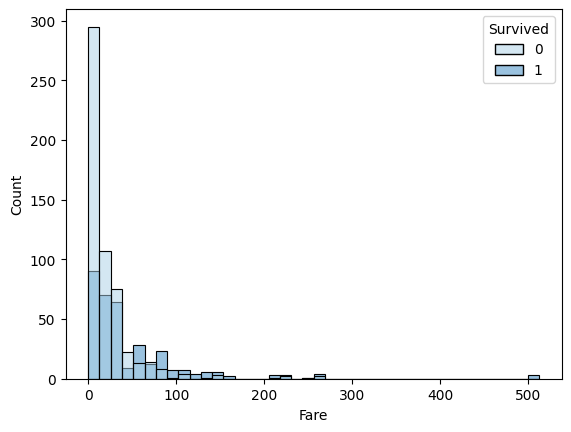

In [25]:
sns.histplot(data = train_df, x= 'Fare', bins = 40, hue= 'Survived', palette= 'Blues')

PassengerId
1       Economic
2         Luxury
3       Standard
4         Luxury
5       Standard
         ...    
887     Standard
888    Expensive
889    Expensive
890    Expensive
891     Economic
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Economic' < 'Standard' < 'Expensive' < 'Luxury']


<Axes: xlabel='Fare', ylabel='count'>

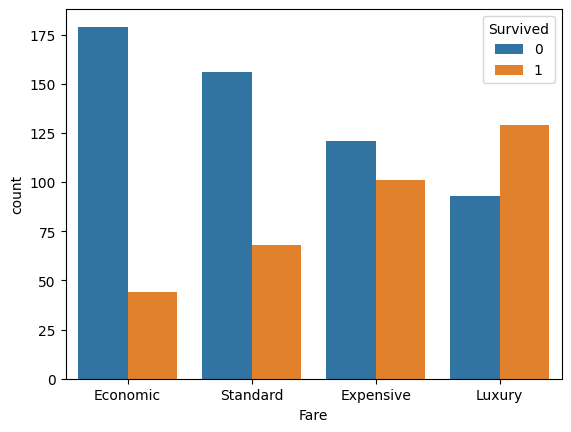

In [26]:
#to name for 0-25% , 25-50, 50-75, 75-100 %%!
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
quartitle_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
print(quartitle_data)

sns.countplot( x = quartitle_data, hue = train_df['Survived'])

* Quartile plot 
    * Passenger with Luxury and Expensive Fare had more chance to survive

***
# 

***
## **4. Feature Engineering & Data Wrangling**


### 4.1. Features Engineering

### a. Name

In [27]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

* Co 1 vai thong tin trong ten nhu la Mr. , Rev. , Miss. , ... thi chung ta co the thong ke cac thuoc tinh nay ra, de xem lieu co anh huong toi survival rate hay khong

- Regular Expression:

In [28]:
#Lay thong tin Mr, Miss, Rev, ...
import re #Regular Express

def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [29]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

- Co 1 truong hop khac biet la 'Mrs. Martin (Elizabeth L '
=> can phai xu ly bang cach sua lai ham extract_title cho chat che hon (da sua)

In [30]:
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [31]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

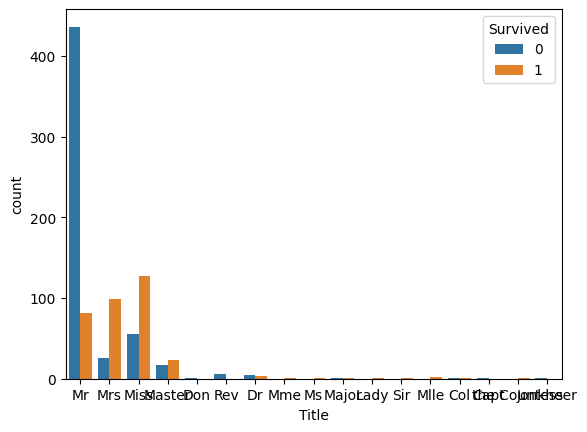

In [32]:
sns.countplot(data = train_df, x = 'Title', hue = 'Survived')

* Tru 4 Title dau tien, cac Title con lai deu co so lieu it hon, nen gop lai thanh 1 loai Title

In [33]:
def group_title(title):
    if title in ['Mr', 'Mrs', 'Miss', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else: 
        return "Others"
    
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

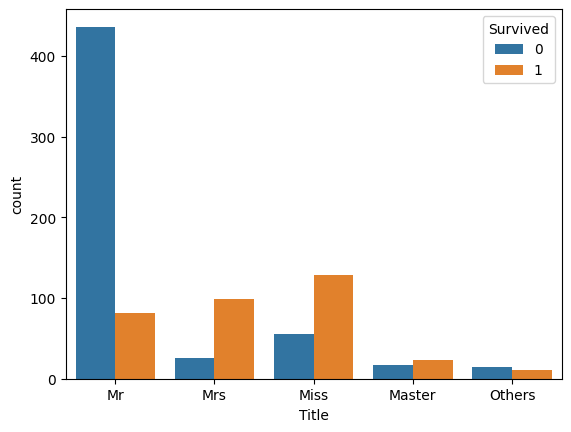

In [34]:
sns.countplot(data = train_df, x = 'Title', hue = 'Survived')

### b. Family
* Combine 2 features : SibSp, Parch in to Family_Size

In [35]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

<Axes: xlabel='Family_Size', ylabel='count'>

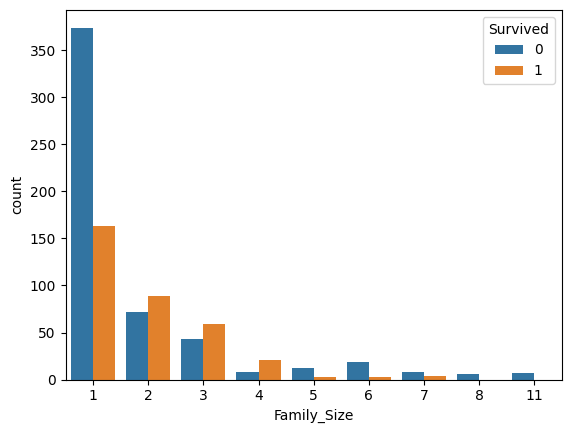

In [36]:
sns.countplot(data= train_df, x='Family_Size', hue = 'Survived')

***
* Cut Family_Size into Solo, Small, Medium, Large

<Axes: xlabel='Family_Cat', ylabel='count'>

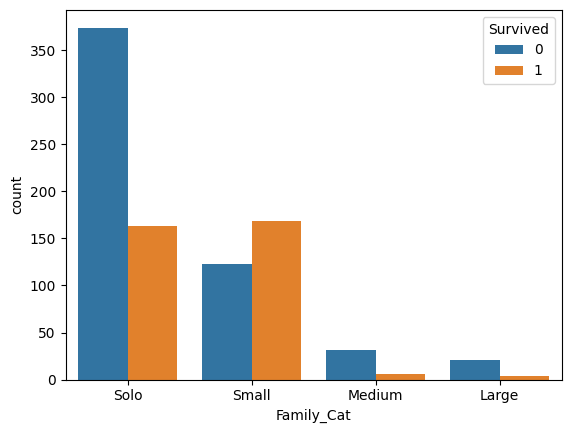

In [37]:
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Solo', 'Small', 'Medium', 'Large']) # (0,1]  ,  (1,4]  ,  (4,6],  (6,20] ))))
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Solo', 'Small', 'Medium', 'Large']) # (0,1]  ,  (1,4]  ,  (4,6],  (6,20] ))))
sns.countplot(data= train_df, x= 'Family_Cat', hue = 'Survived')

### **4.2. Data Wrangling**

In [38]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [39]:
#Dem cac cols con thieu values
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col} has {missing_count*100/n_rows:.2f}% missing values.")

display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)


Col Age has 19.87% missing values.
Col Embarked has 0.22% missing values.
Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


***
### Fill missing values bang nhung value thich hop

##### Age

In [56]:
age_by_sex_pclass = train_df.groupby(['Sex','Pclass'])['Age'].median()

# train_df.info()
# train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

/tmp/ipykernel_6454/65419528.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_sex_pclass = train_df.groupby(['Sex','Pclass'])['Age'].median()


In [58]:
# test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64